In [28]:
import pandas as pd

# Loading the CSV file
file_path = r"C:\Users\Arsal Naveed\Desktop\AICP Internship\week_06\births.csv"
df = pd.read_csv(file_path)

# Extracting the decade from the 'year' column and creating a new column 'Decade'
df['Decade'] = (df['year'] // 10) * 10

# Displaying the first few rows of the DataFrame with the new 'Decade' column
print(df.head())

# Saving the modified DataFrame
df.to_csv(file_path, index=False)


   year  month  day gender  births  Decade
0  1969      1  1.0      F    4046    1960
1  1969      1  1.0      M    4440    1960
2  1969      1  2.0      F    4454    1960
3  1969      1  2.0      M    4548    1960
4  1969      1  3.0      F    4548    1960


In [29]:
df.describe()

,year,month,day,births,Decade
count,15547.000000,15547.000000,15067.000000,15547.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561,1974.544285
std,6.728340,3.449632,15.284034,28552.465810,6.789583
min,1969.000000,1.000000,1.000000,1.000000,1960.000000
25%,1974.000000,4.000000,8.000000,4358.000000,1970.000000
50%,1979.000000,7.000000,16.000000,4814.000000,1970.000000
75%,1984.000000,10.000000,24.000000,5289.500000,1980.000000
max,2008.000000,12.000000,99.000000,199622.000000,2000.000000


In [30]:
# Checking for missing values in the DataFrame
missing_values = df.isnull().sum()

# Displaying the count of missing values for each column
print("Missing values per column:")
print(missing_values)


Missing values per column:
year        0
month       0
day       480
gender      0
births      0
Decade      0
dtype: int64


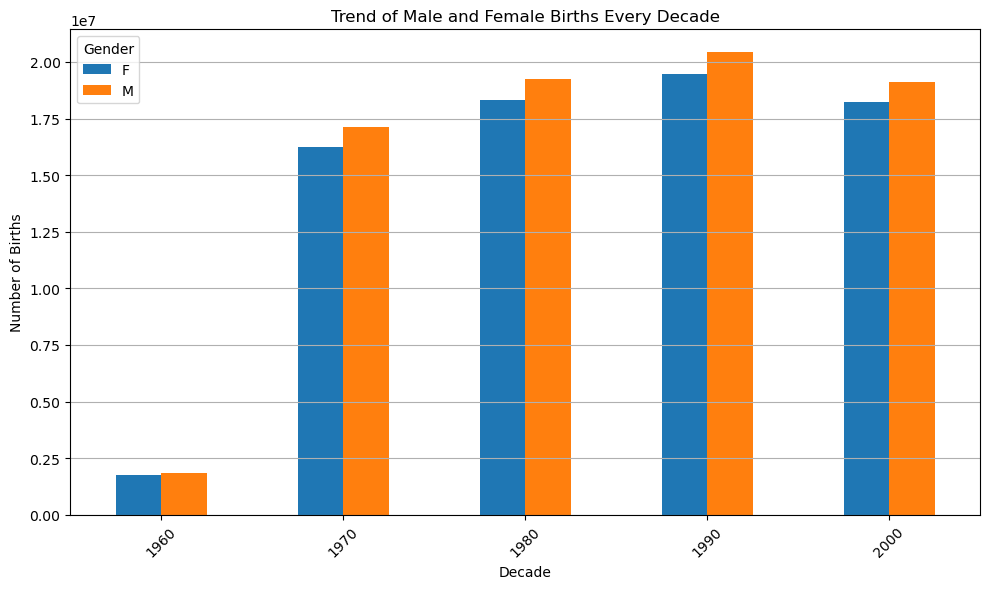

In [31]:
import matplotlib.pyplot as plt

# Grouping the data by decade and gender and calculating the sum of births
births_by_decade_gender = df.groupby(['Decade', 'gender'])['births'].sum().unstack()

# Plotting the trend of male and female births every decade
births_by_decade_gender.plot(kind='bar', figsize=(10, 6))
plt.title('Trend of Male and Female Births Every Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Births')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [32]:
import numpy as np

# Calculating the mean and standard deviation of the 'births' column
mean_births = df['births'].mean()
std_births = df['births'].std()

# Defining the lower and upper bounds for filtering outliers
lower_bound = mean_births - 5 * std_births
upper_bound = mean_births + 5 * std_births

# Filtering the DataFrame to include only rows where 'births' fall within the specified bounds
filtered_df = df[(df['births'] >= lower_bound) & (df['births'] <= upper_bound)]

# Displaying the shape of the filtered DataFrame to compare with the original DataFrame
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", filtered_df.shape)


Original DataFrame shape: (15547, 6)
Filtered DataFrame shape: (15086, 6)


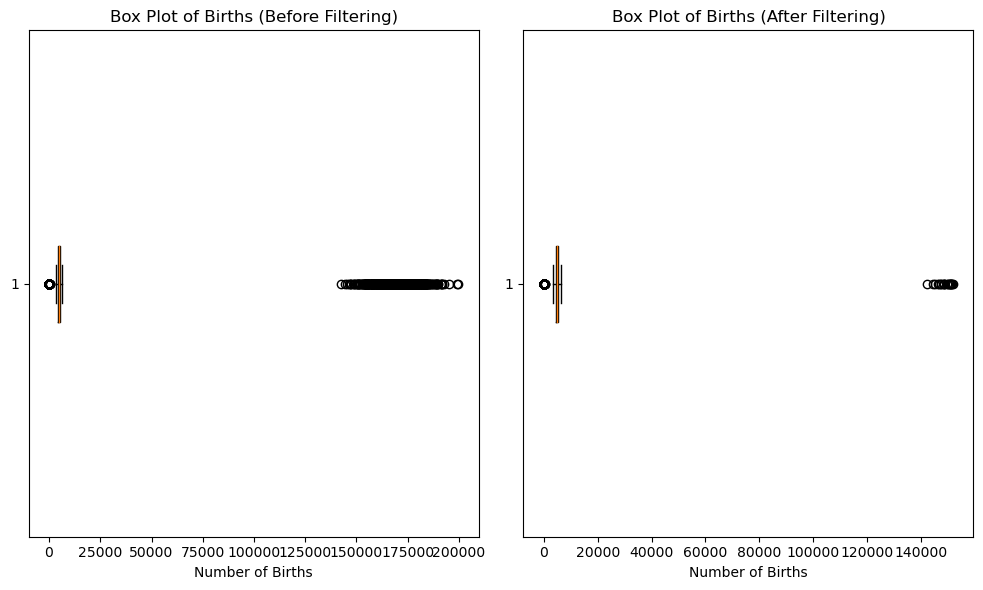

In [33]:
# Creating a figure and axis for the box plot
plt.figure(figsize=(10, 6))

# Ploting box plot before filtering outliers
plt.subplot(1, 2, 1)
plt.boxplot(df['births'], vert=False)
plt.title('Box Plot of Births (Before Filtering)')
plt.xlabel('Number of Births')

# Ploting box plot after filtering outliers
plt.subplot(1, 2, 2)
plt.boxplot(filtered_df['births'], vert=False)
plt.title('Box Plot of Births (After Filtering)')
plt.xlabel('Number of Births')

plt.tight_layout()
plt.show()


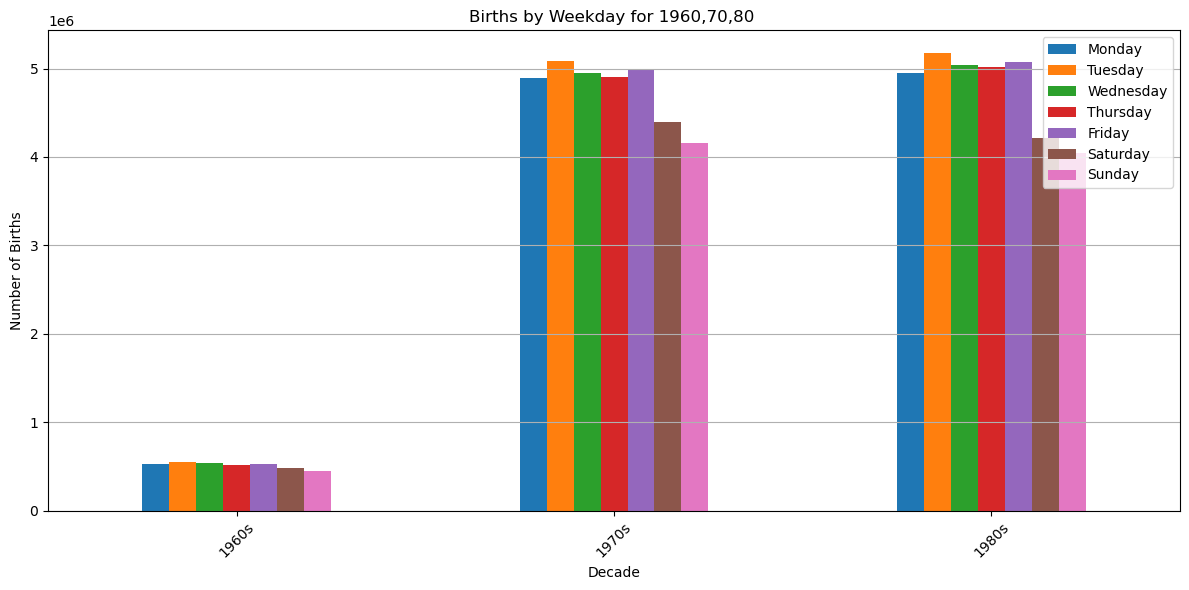

In [34]:
# Plotting births by weekday for several decades using a bar graph
births_by_weekday_decade.plot(kind='bar', figsize=(12, 6))
plt.title('Births by Weekday for 1960,70,80 ')
plt.xlabel('Decade')
plt.ylabel('Number of Births')
plt.xticks(range(len(births_by_weekday_decade.index)), [str(year) + 's' for year in births_by_weekday_decade.index], rotation=45)
plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], loc='upper right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



In [35]:
# Grouping the data by month and calculating the sum of births for each month
births_by_month = df.groupby('month')['births'].sum()

# Grouping the data by day and calculating the sum of births for each day
births_by_day = df.groupby('day')['births'].sum()

# Displaying the result
print("Births by Month:")
print(births_by_month)

print("\nBirths by Day:")
print(births_by_day)


Births by Month:
month
1     12364197
2     11541178
3     12678844
4     12085891
5     12624972
6     12521070
7     13367556
8     13528007
9     13252831
10    12954950
11    12197967
12    12656915
Name: births, dtype: int64

Births by Day:
day
1.0     2286854
2.0     2303168
3.0     2309087
4.0     2286588
5.0     2296951
6.0     2308073
7.0     2314081
8.0     2322376
9.0     2315055
10.0    2327197
11.0    2319561
12.0    2322956
13.0    2290896
14.0    2335551
15.0    2333426
16.0    2332456
17.0    2335458
18.0    2334949
19.0    2331183
20.0    2337631
21.0    2329563
22.0    2317711
23.0    2305174
24.0    2290500
25.0    2283975
26.0    2300208
27.0    2314088
28.0    2328630
29.0    2189278
30.0    2141788
31.0    1342126
99.0       6403
Name: births, dtype: int64


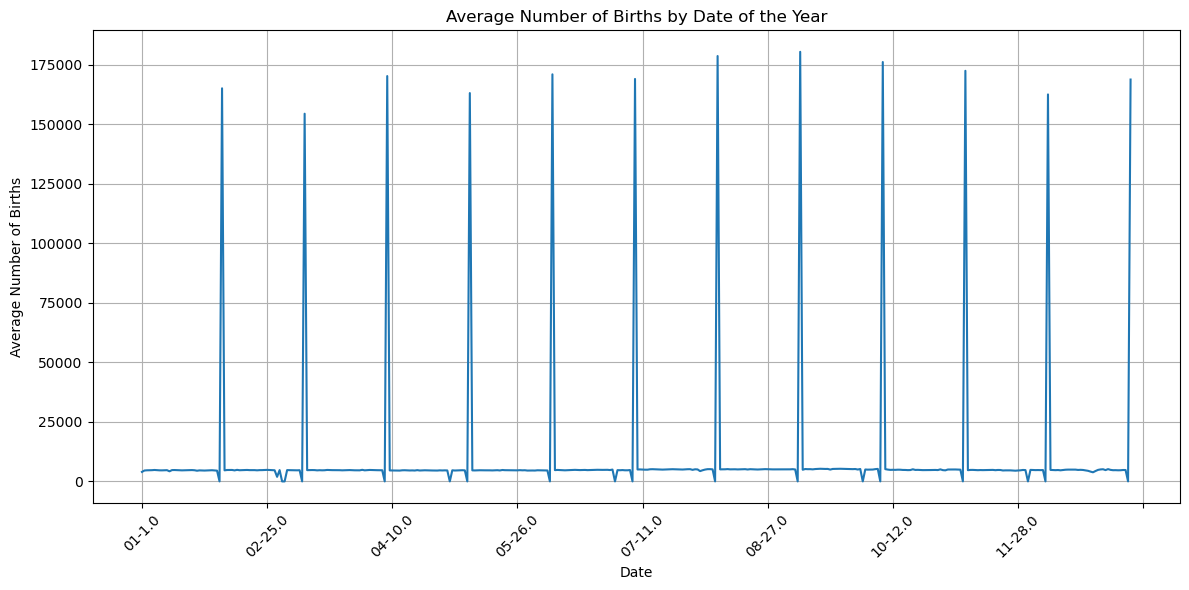

In [36]:
# Combining month and day into a single column to create a date without the year
df['date'] = df['month'].astype(str).str.zfill(2) + '-' + df['day'].astype(str).str.zfill(2)

# Grouping the data by date and calculating the average number of births for each date
average_births_by_date = df.groupby('date')['births'].mean()

# Plotting the time series of average number of births by date
plt.figure(figsize=(12, 6))
average_births_by_date.plot()
plt.title('Average Number of Births by Date of the Year')
plt.xlabel('Date')
plt.ylabel('Average Number of Births')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
